#  NLP- Reviews Analysis

In [ ]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#general setttings
sns.set_context('poster',0.6)
sns.set_style('darkgrid')

In [3]:
#reading file
path  = r'C:\Users\97250\Desktop\studied\R ,python\data science JOSE\20-Natural-Language-Processing\yelp.csv'
data = pd.read_csv(path,header=0 )

## Assistant function

In [125]:
# helpfull function
def show(column,ordinary=True):

    """
    This function shows info about given column on ranking
    """
    
    agg  =  data.groupby('stars').mean().reset_index()[[column,'stars']]
    
    corrValue = agg.corr().iloc[0][1]
    corrValue = str(round(corrValue ,3) )
    
    #shows data
    plt.figtext(.5,.9,"\n " + column.capitalize() +"  Relate to Rank \n corr = " +corrValue  + "\n", fontsize=25, ha='center')

    ##plt.title("\n " + column.capitalize() +"  Relate to Rank \n\n corr = " +corrValue  + "\n")
    if ordinary:
        sns.barplot(x='stars', y = column, data = agg) 
    else:
        sns.countplot(x=column,data = data) 

    plt.ylabel(column.capitalize()+' Frequency \n')
    plt.xlabel("")  

In [17]:
data

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,26/01/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,27/07/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,14/06/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,27/05/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,05/01/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,28/07/2012,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,18/01/2012,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,16/11/2010,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,02/12/2012,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


# Feature Engineering


In [84]:

# adding length of review    The most affectin feature as it seems
data['words'] = data['text'].apply(lambda x:len(x.split()))

In [ ]:
sns.jointplot(x='fare',y='age',data= ti)
sns.distplot(ti['fare'], kde =False,color = 'pink')
sns.countplot(x='sex',data=ti)  #or : sns.countplot(x=ti['sex'])

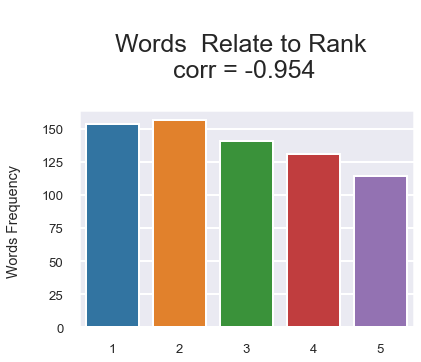

In [126]:
show('words')

##  Creating time features

In [46]:
###       adding dates kind to data

data['timeStamp'] = data['date'].apply(lambda x : pd.to_datetime(x))

data['month'] = data['timeStamp'].apply(lambda x : x.month)
data['day of month'] = data['timeStamp'].apply(lambda x : int(x.day))

##dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['day of week'] = data['timeStamp'].apply(lambda x:x.dayofweek)

######################

## Lets check the impact of time over Rank

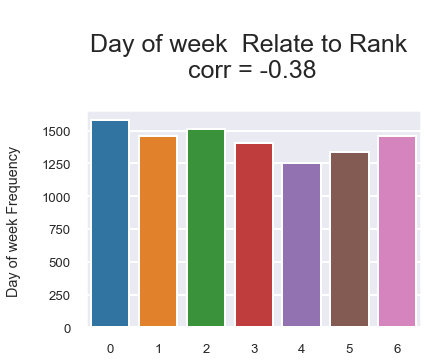

In [111]:
show('day of week',ordinary=False)

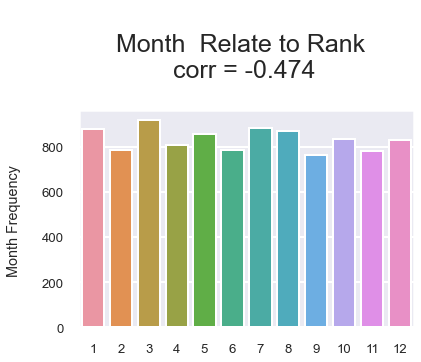

In [112]:
show('month',ordinary=False)

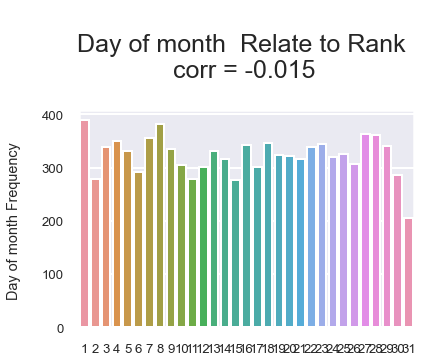

In [113]:
show('day of month',ordinary=False)

##  Apparantly no impact of Time-Features over Rank

#        NLP section

### Creating question & answer marks-Features 

In [102]:
data['answer_mark'] = data['text'].apply(lambda x:x.count('!'))
data['question_mark'] = data['text'].apply(lambda x:x.count('?'))

### Creating Anger Words-Features   

### 3 versions:

In [103]:
anger_words                  = ['fuck','fucking','annoying','shitty','ass','busy','too loud','too busy','too noisy','disaster','bad','not'] #corr 0.94
anger_words_without_ambigous = ['fuck','fucking','annoying','shitty','ass','busy','too loud','too busy','too noisy','disaster','bad']       #corr 0.998
fucking_bad                  = ['fucking','bad']      #corr 0.9937


listsStrs   = 'anger_words,anger_words_without_ambigous,fucking_bad'.split(',')
listsValues = [anger_words,anger_words_without_ambigous,fucking_bad]


#sum of each words group

def angry(text):
    summ=0
    for word in text.lower().split():
        if word in l:
            summ+=1
    return summ


# create 3 more columns and present data
    
for c,l in enumerate(listsValues):
    
    # Adding column
    data[listsStrs[c]] = data['text'].apply(angry) 

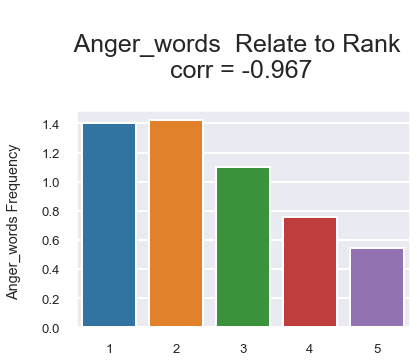

In [114]:
show('anger_words')

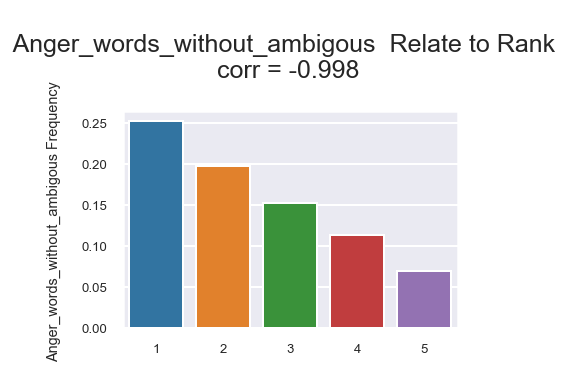

In [115]:
show('anger_words_without_ambigous')

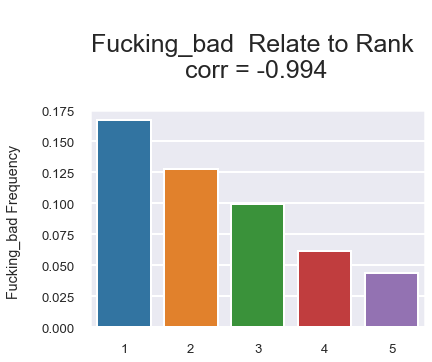

In [116]:
show('fucking_bad')

# Seems like fucking_bad-words has the best coorelation:    0.99!!

##           Advance Reasearch

In [12]:
   
    
    
    ###   unusuefull use of the mediate function

# devied data to:
top_50_reviwed_besinesses = data.groupby('business_id').count()['words'].sort_values(ascending=False).iloc[:51].drop('#NAME?')
dataOfTop50 = data.set_index('business_id').loc[top_50_reviwed_besinesses.index]


# 30 highly reviewers
top_30_users = data.groupby('user_id').count()['words'].sort_values(ascending=False).iloc[:31].drop('#NAME?')
# data of them
dataOf_Top30Users = data.set_index('user_id').loc[top_30_users.index]

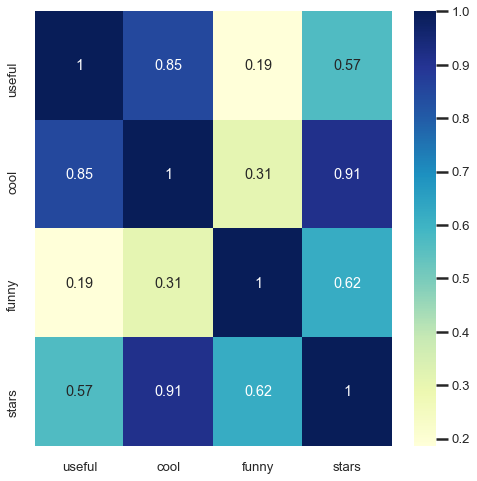

In [75]:
# general corr of ranking columns
plotData = abs(data.groupby('stars').var().reset_index()[['useful','cool','funny','stars']].corr())

plt.figure(figsize=(8,8))
sns.heatmap(plotData,cmap='YlGnBu',annot=True)

In [132]:
questionMark_toRank = data.groupby('stars').mean().reset_index()[['question_mark','stars']]
print(questionMark_toRank,questionMark_toRank.corr(),sep = '\n\n')

   question_mark  stars
0       0.732977      1
1       0.615965      2
2       0.410678      3
3       0.254963      4
4       0.227450      5

               question_mark    stars
question_mark        1.00000 -0.97824
stars               -0.97824  1.00000


###       question mark highly affects rank.  corr:0.97

          words     stars
words  1.000000 -0.987991
stars -0.987991  1.000000 



               question_mark    stars
question_mark        1.00000 -0.97824
stars               -0.97824  1.00000 





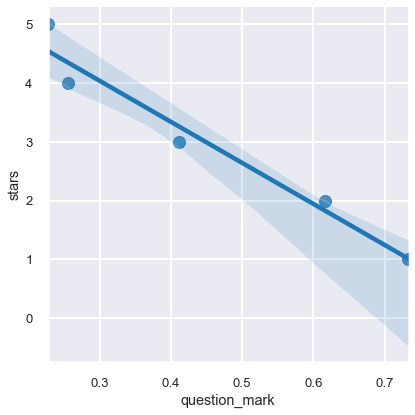

In [133]:
print(data.groupby('stars').var().reset_index()[['words','stars']].corr(),'\n\n\n')


sns.lmplot(height=6,x='question_mark',y='stars',data = questionMark_toRank)
print(questionMark_toRank.corr(),'\n\n\n')

In [16]:
### strong correlation
dataOf_rankOfTopUsers_andWordsAvg = dataOf_Top30Users.groupby(['stars','user_id']).mean().unstack(0)['words']

a = dataOf_rankOfTopUsers_andWordsAvg.transpose()

print("the variance of the top viewers in all their views:\n\n",a.var(),'\n\n')
print("the mean of the top viewers in all their views:\n\n" ,a.mean())

the variance of the top viewers in all their views:

 user_id
0CMz8YaO3f8xu4KqQgKb9Q     1850.570574
0bNXP9quoJEgyVZu9ipGgQ     8052.402556
0mqHhdKEdak_A1FBhFNXqA     2165.472222
3gIfcQq5KxAegwCPXc83cQ    15149.391111
4ozupHULqGyO42s3zNUzOQ     1009.690370
6ts41fCsDKHbFZaKOMNmVQ      545.375833
7GC9fVWKa4a1ZmBGLH6Uww    18281.480556
90a6z--_CUrl84aCzZyPsg       99.571181
APLIPfq1Rf8QyhHHk2uAyA    56920.972222
Cp-PV8rsypbO-xBrQ6KmQg    15002.604167
JffajLV-Dnn-eGYgdXDxFg     2282.783704
JgDkCER12uiv4lbpmkZ9VA     5607.147222
Kqvfep2mxS10S50FbVDi4Q       41.470026
M6oU3OBf_E6gqlfkLGlStQ     4392.893750
P2kVk4cIWyK4e4h14RhK-Q     2259.920573
ST8Yzlk2MqKlcaLqL2djBg      242.386831
T5mD6ggC7fh48QgXR0LevA      183.098958
W_QXYA7A0IhMrvbckz7eVg     1581.265625
XqMkm-DD9VsdcKx2YVGhSA     1430.132086
_PzSNcfrCjeBxSLXRoMmgQ     2048.335069
fczQCSmaWF78toLEmb0Zsw     3367.954254
fev0iI-XDrteD4SYRKjiUw     6499.106296
ikm0UCahtK34LbLCEw4YTw    14193.609410
joIzw_aUiNvBTuGoytrH7g     3696.670222
lP

In [26]:
######        Machine Learning Section    ###########

#       drop session

# drop time features
data.drop(['day of month','date','timeStamp','day of week'],axis=1,inplace=True)
# drop unnessary columns
data.drop(['type','review_id'],axis=1,inplace=True)

# drop categorial features 
data.drop(['user_id','text','business_id'],axis=1,inplace=True)
## Do notice!   some of features here are highly expensive.
# besiness_id - some business may be reaky successfull
        # after finding t
        #op businesses , make dummies of them and concat
# text - BOW- This is the essential of this task
# user_id - in deep learning find the specific -highly reviewers-users
        # and get dummies and see what is the affect of them
        

###################

X = data.drop('stars',axis=1)
y = data[['stars']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


#evaluation function
from sklearn.metrics import mean_absolute_error,mean_squared_error

def evaluate():
    """
    Evaluation function
    
    No input
    
    Print model's evaluation by what's in 'predictions' variable
    """
    
    MAE = round(mean_absolute_error(predictions,y_test),5)
    
    print('\n\n')
    print('The RMSE is: ' , round(np.sqrt(mean_squared_error(predictions,y_test)),5))
    print('The MAE  is: ' , round(MAE,5))
    
    print('\n')
    print('The mean is: ', y.mean())
    print('The rational MAE is: ' , round(MAE/y.mean(),3))



####          tree      #####


from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X_train, y_train, cv=10)

regressor.fit(X_train,y_train)

predictions = regressor.predict(X_test)

In [28]:

evaluate()

##0.86






The RMSE is:  1.58784
The MAE  is:  1.16953


The mean is:  stars    3.7775
dtype: float64
The rational MAE is:  stars    0.31
dtype: float64
